In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

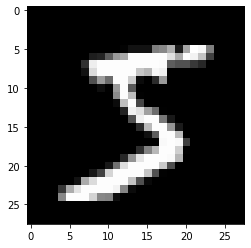

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

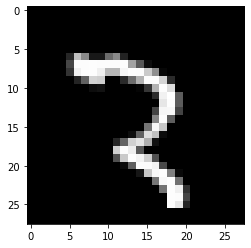

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1))) 
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu'))
model.add(layers.AvgPool2D (pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='tanh')) 
model.add(layers.Dense(10, activation ='softmax'))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 32)       0         
 ooling2D)                                                       
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 32)                200736    
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 201,386
Trainable params: 201,386
Non-trainable params: 0
__________________________________________________

In [ ]:
# Choose the appropriate parameters
model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=7,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/7
938/938 [==============================] - 24s 25ms/step - loss: 0.2778 - accuracy: 0.9251 - val_loss: 0.1118 - val_accuracy: 0.9693
Epoch 2/7
938/938 [==============================] - 23s 24ms/step - loss: 0.0899 - accuracy: 0.9751 - val_loss: 0.0681 - val_accuracy: 0.9780
Epoch 3/7
938/938 [==============================] - 23s 25ms/step - loss: 0.0598 - accuracy: 0.9833 - val_loss: 0.0634 - val_accuracy: 0.9799
Epoch 4/7
938/938 [==============================] - 23s 24ms/step - loss: 0.0456 - accuracy: 0.9869 - val_loss: 0.0534 - val_accuracy: 0.9816
Epoch 5/7
938/938 [==============================] - 23s 24ms/step - loss: 0.0363 - accuracy: 0.9898 - val_loss: 0.0508 - val_accuracy: 0.9821
Epoch 6/7
938/938 [==============================] - 23s 24ms/step - loss: 0.0294 - accuracy: 0.9919 - val_loss: 0.0523 - val_accuracy: 0.9827
Epoch 7/7
938/938 [==============================] - 23s 24ms/step - loss: 0.0240 - accuracy: 0.9934 - val_loss: 0.0550 - val_accuracy: 0.9826

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.277789,0.925083,0.111822,0.9693
1,0.089905,0.975117,0.068119,0.9780
2,0.059797,0.983250,0.063447,0.9799
3,0.045627,0.986917,0.053376,0.9816
4,0.036280,0.989750,0.050797,0.9821


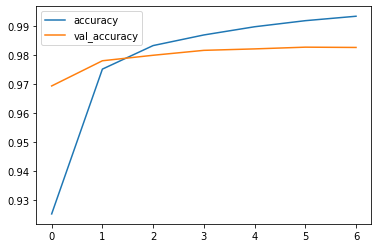

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

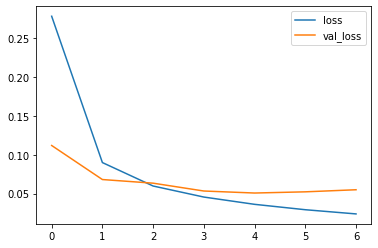

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 970    0    1    2    1    0    2    0    4    0]
 [   0 1122    3    0    0    0    4    2    4    0]
 [   2    1 1016    3    0    0    0    3    7    0]
 [   1    0    3  997    0    2    0    1    6    0]
 [   0    0    2    0  978    0    0    0    1    1]
 [   1    0    2   10    0  872    5    0    2    0]
 [   3    2    1    0    3    1  945    0    3    0]
 [   0    2    9    3    1    0    0 1001    6    6]
 [   3    0    4    1    0    1    0    2  963    0]
 [   2    2    1    3   13    5    0    7   14  962]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.97      0.98      1028
           8       0.95      0.99      0.97       974
           9       0.99      0.95      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



**Prediction for a single input**



In [ ]:
img = image.load_img('eight.jpeg')

In [ ]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:

img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

In [ ]:
print(x_single_prediction)

[6]


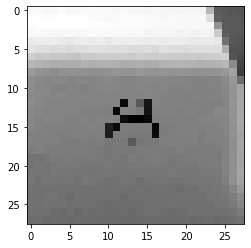

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')